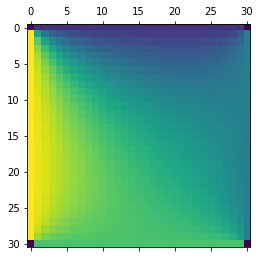

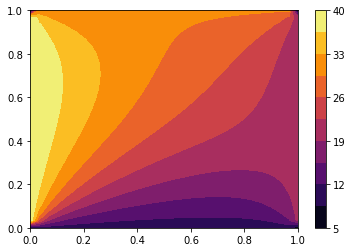

In [1]:
#2D квадратная сетка стационар ГУ-1
import numpy as np
import matplotlib.pyplot as plt

T1 = 10
T2 = 20
T3 = 30
T4 = 40

lamda = 50
qv = 1000

L = 1
M = 31
l = L/(M-1)

T = np.zeros((M,M))

T[0,:]  = T1
T[:,-1] = T2
T[-1,:] = T3
T[:,0]  = T4

T[0,0]   = 5
T[0,-1]  = 5
T[-1,0]  = 5
T[-1,-1] = 5

for i in range(99999):
    Told = T.copy()
    
    for n in range(1,M-1):
        for m in range(1,M-1):
            T[n,m] = ( T[n,m-1] + T[n,m+1] + T[n-1,m] + T[n+1,m] + qv*l**2/lamda )/4
    
    if np.amax((T-Told)/T) < 10**-5:
        break

plt.matshow(T)
plt.show()

n=10
X = [i*l for i in range(M)]
plt.contourf(X,X,T, cmap='inferno', levels =[np.amin(T)+i*(np.amax(T)-np.amin(T))/n for i in range(n+1)])
plt.colorbar(ticks = [np.amin(T)+i*(np.amax(T)-np.amin(T)) for i in np.arange(0,1.1,0.20)])
plt.show()

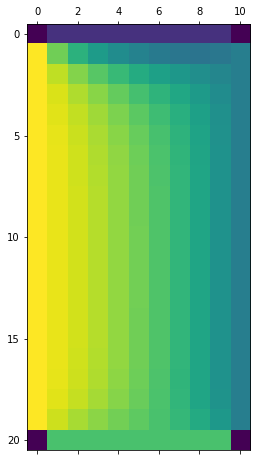

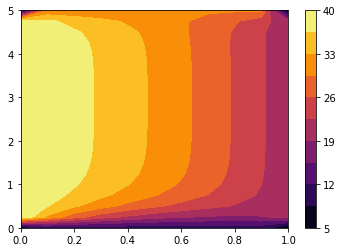

In [2]:
#2D прямоугольная сетка стационар ГУ-1
import numpy as np
import matplotlib.pyplot as plt

T1 = 10
T2 = 20
T3 = 30
T4 = 40

lamda = 50
qv = 1000

L = 1
W = 5

M = 11
N = 21

dx = L/(M-1)
dy = W/(N-1)

T = np.zeros((N,M))

T[0,:]  = T1
T[:,-1] = T2
T[-1,:] = T3
T[:,0]  = T4

T[0,0]   = 5
T[0,-1]  = 5
T[-1,0]  = 5
T[-1,-1] = 5

for i in range(99999):
    Told = T.copy()
    
    for n in range(1,N-1):
        for m in range(1,M-1):
            T[n,m] = ( dy**2*T[n,m-1] + dy**2*T[n,m+1] + dx**2*T[n-1,m] + dx**2*T[n+1,m] + qv*dx**2*dy**2/lamda )/( 2*dx**2 + 2*dy**2 )
    
    if np.amax((T-Told)/T) < 10**-5:
        break

plt.matshow(T)
plt.show()

n=10
X = [i*dx for i in range(M)]
Y = [i*dy for i in range(N)]
plt.contourf(X,Y,T, cmap='inferno', levels =[np.amin(T)+i*(np.amax(T)-np.amin(T))/n for i in range(n+1)])
plt.colorbar(ticks = [np.amin(T)+i*(np.amax(T)-np.amin(T)) for i in np.arange(0,1.1,0.20)])
plt.show()

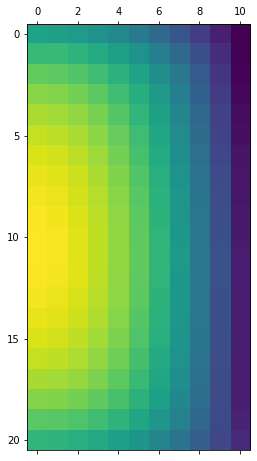

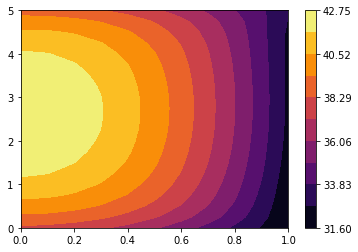

In [12]:
#2D прямоугольная сетка стационар ГУ-3
import numpy as np
import matplotlib.pyplot as plt

Tf1 = 10
Tf2 = 20
Tf3 = 30
Tf4 = 40
alpha1 = 10
alpha2 = 40
alpha3 = 30
alpha4 = 20

lamda = 50
qv = 1000

L = 1
W = 5

M = 11
N = 21

dx = L/(M-1)
dy = W/(N-1)

T = np.zeros((N,M))

for i in range(99999):
    Told = T.copy()
    
    T[0,0]     = ( Tf4*alpha4*dy**2/2*dx + Tf1*alpha1*dx**2/2*dy + lamda*dy**2/2*T[0,1]     + lamda*dx**2/2*T[1,0]     + qv*dx**2*dy**2/4 )/( alpha4*dy**2/2*dx + alpha1*dx**2/2*dy + lamda*dy**2/2 + lamda*dx**2/2 )
    T[0,M-1]   = ( Tf2*alpha2*dy**2/2*dx + Tf1*alpha1*dx**2/2*dy + lamda*dy**2/2*T[0,M-2]   + lamda*dx**2/2*T[1,M-1]   + qv*dx**2*dy**2/4 )/( alpha2*dy**2/2*dx + alpha1*dx**2/2*dy + lamda*dy**2/2 + lamda*dx**2/2 )
    T[N-1,M-1] = ( Tf2*alpha2*dy**2/2*dx + Tf3*alpha3*dx**2/2*dy + lamda*dy**2/2*T[N-1,M-2] + lamda*dx**2/2*T[N-2,M-1] + qv*dx**2*dy**2/4 )/( alpha2*dy**2/2*dx + alpha3*dx**2/2*dy + lamda*dy**2/2 + lamda*dx**2/2 )
    T[N-1,0]   = ( Tf4*alpha4*dy**2/2*dx + Tf3*alpha3*dx**2/2*dy + lamda*dy**2/2*T[N-1,1]   + lamda*dx**2/2*T[N-2,0]   + qv*dx**2*dy**2/4 )/( alpha4*dy**2/2*dx + alpha3*dx**2/2*dy + lamda*dy**2/2 + lamda*dx**2/2 )
    
    for n in range(1,N-1):
        T[n,0]   = ( Tf4*alpha4*dx**2*dy + lamda*dy**2/2*T[n-1,0]   + lamda*dy**2/2*T[n+1,0]   + lamda*dx**2*T[n,1]   +qv*dx**2*dy**2/2 )/( alpha4*dx**2*dy + lamda*dy**2 + lamda*dx**2 )
        T[n,M-1] = ( Tf2*alpha2*dx**2*dy + lamda*dy**2/2*T[n-1,M-1] + lamda*dy**2/2*T[n+1,M-1] + lamda*dx**2*T[n,M-2] +qv*dx**2*dy**2/2 )/( alpha2*dx**2*dy + lamda*dy**2 + lamda*dx**2 )
        
        for m in range(1,M-1):
            T[0,m]   = ( Tf1*alpha1*dx**2*dy + lamda*dy**2/2*T[0,m-1]   + lamda*dy**2/2*T[0,m+1]   + lamda*dx**2*T[1,m]   + qv*dx**2*dy**2/2 )/( alpha1*dx**2*dy + lamda*dy**2 + lamda*dx**2 )
            T[N-1,m] = ( Tf3*alpha3*dx**2*dy + lamda*dy**2/2*T[N-1,m-1] + lamda*dy**2/2*T[N-1,m+1] + lamda*dx**2*T[N-2,m] + qv*dx**2*dy**2/2 )/( alpha3*dx**2*dy + lamda*dy**2 + lamda*dx**2 )
            T[n,m]   = ( dy**2*T[n,m-1] + dy**2*T[n,m+1] + dx**2*T[n-1,m] + dx**2*T[n+1,m] + qv*dx**2*dy**2/lamda )/( 2*dx**2 + 2*dy**2 )
            
    if np.amax((T-Told)/T) < 10**-5:
        break

plt.matshow(T)
plt.show()

n=10
X = [i*dx for i in range(M)]
Y = [i*dy for i in range(N)]
plt.contourf(X,Y,T, cmap='inferno', levels =[np.amin(T)+i*(np.amax(T)-np.amin(T))/n for i in range(n+1)])
plt.colorbar(ticks = [np.amin(T)+i*(np.amax(T)-np.amin(T)) for i in np.arange(0,1.1,0.20)])
plt.show()